In [1]:
import networkx as nx
import numpy as np
from numpy import radians as rad

import os 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.lines as lines 

import scipy.stats as ss
from scipy.io import mmread

import seaborn as sns
import pandas as pd

In [2]:
import os
print(os.getcwd());os.chdir('/data01/ch6845/MarcoPolo/')
print(os.getcwd())

/data01/ch6845/MarcoPolo/experiments
/data01/ch6845/MarcoPolo


In [3]:
# ref: https://matplotlib.org/gallery/api/font_family_rc_sgskip.html
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams["mathtext.fontset"] = 'dejavusans'

In [6]:
from matplotlib import font_manager
font_fname = '/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
font_family

'Arial'

In [7]:
from matplotlib import font_manager


font_fname = '/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/arialbd.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
font_family

'Arial'

In [8]:
from matplotlib import font_manager

def font_prop(bold=False,**kwargs):
    if bold==True:
        path='/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/arialbd.ttf'
    else:
        path='/home/ch6845/tools/miniconda3/envs/MarcoPolo/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf'
    fontproperties=font_manager.FontProperties(fname=path,
                                                   **kwargs)
    return fontproperties

In [9]:
font_manager.FontProperties?

In [10]:
a=font_prop(size=20)

In [11]:
a.get_size()

20.0

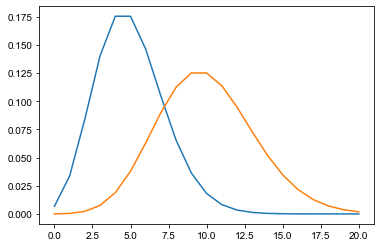

In [10]:
# generate bimodal distribution
x = np.linspace(0, 20, 21)
y1 = ss.poisson.pmf(k=x, mu=5)
y2 = ss.poisson.pmf(k=x, mu=10)
plt.plot(x, y1)
plt.plot(x, y2)

In [11]:
from matplotlib import colors
colors.to_rgb('orange'),colors.to_rgb('red')

((1.0, 0.6470588235294118, 0.0), (1.0, 0.0, 0.0))

In [7]:
#exp_data_meta=exp_data_meta.iloc[np.arange(1,len(exp_data_meta),2)]

In [12]:
def tsne_plot(ax1, ax2):
    
    exp_data_meta=pd.read_csv('/data01/ch6845/dynamic_cell_classifier/data/koh_extract/koh.metadata.tsv',sep='\t')
    exp_data_meta=exp_data_meta.rename(columns={'tSNE_1':'TSNE_1','tSNE_2':'TSNE_2'})
    exp_data_meta['phenoid']=exp_data_meta['celltype']    
    
    #exp_data_meta=pd.read_csv('/data01/ch6845/MarcoPolo/datasets/extract/Kohinbulk_filtered.metadatacol.tsv',sep='\t')
    #exp_data_meta=exp_data_meta.iloc[np.arange(1,len(exp_data_meta))[np.arange(1,len(exp_data_meta))%3!=0]]
    
    #cols = exp_data_meta['celltype'].values
    
    #cols[cols=='hESC'] = 'red'
    #cols[cols!='red'] = 'orange'

        
    ax1.scatter(exp_data_meta['TSNE_1'], 
                exp_data_meta['TSNE_2'], 
                c=(0.5,0.5,0.5,0.8), s=80)
    
    ax1.set_xticks([])
    ax1.set_yticks([])

    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)    
    
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)    
    
    ax1.set_xlabel('tSNE1', fontsize=20)
    ax1.set_ylabel('tSNE2', fontsize=20)     
    
    """
    ax2.scatter(exp_data_meta['TSNE_1'], 
                exp_data_meta['TSNE_2'], 
                c=(0.7,0.7,0.7,0.8), s=30)
    
    ax2.scatter(exp_data_meta[exp_data_meta['phenoid']!='hESC']['TSNE_1'], 
                exp_data_meta[exp_data_meta['phenoid']!='hESC']['TSNE_2'], 
                edgecolor=[0,0,1,0.8],
                facecolors="None",
                s=30)    
    
    ax2.scatter(exp_data_meta[exp_data_meta['phenoid']=='hESC']['TSNE_1'], 
                exp_data_meta[exp_data_meta['phenoid']=='hESC']['TSNE_2'], 
                edgecolor=[1,0,0,0.8],
                facecolors="None",
                s=30)
    """
    ax2.scatter(exp_data_meta[exp_data_meta['phenoid']!='hESC']['TSNE_1'], 
                exp_data_meta[exp_data_meta['phenoid']!='hESC']['TSNE_2'], 
                c=np.array([256, 150, 0, 256])/256,
                s=80)    
    
    ax2.scatter(exp_data_meta[exp_data_meta['phenoid']=='hESC']['TSNE_1'], 
                exp_data_meta[exp_data_meta['phenoid']=='hESC']['TSNE_2'], 
                c=np.array([256, 0, 0, 256])/256,
                s=80)    
    
    
    ax2.set_xticks([])
    ax2.set_yticks([])

    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(3)    
        
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)    
    
    ax2.set_xlabel('tSNE1', fontsize=20)
    ax2.set_ylabel('tSNE2', fontsize=20)        
    

In [13]:
#plt.fill_between?

In [14]:
#exp_data_meta=pd.read_csv('/data01/ch6845/MarcoPolo/datasets/extract/Kohinbulk_filtered.metadatacol.tsv',sep='\t')

In [15]:
#plt.

In [16]:
def QQ_score(ax):
    # title text
    ax.text(6, 3.3, 'Bimodality score', fontproperties=font_prop(bold=True,size=25), ha='center', va='bottom')
    """
    ax.text(6, 3, r'$Q_{after}/Q_{before}$'+' & '+r'$Q_{after}-Q_{before}$', fontsize=20, ha='center')
    """
    ax1 = ax.inset_axes([0.5+1/9, 1/20,      3/10,    1/3-1/9])
    ax2 = ax.inset_axes([0.5+1/9, 1/3 + 1/9, 3/10,     1/3-1/9])
    
    ax.text(5.4, 1.35, 'Low score', va='top', ha='left', fontsize=20)
    ax.text(5.4, 3, 'High score', va='top', ha='left', fontsize=20)
    
    x = np.linspace(0, 30, 31)
    y1 = ss.poisson.pmf(k=x, mu=5)
    y2 = ss.poisson.pmf(k=x, mu=20)
    
    y3 = ss.poisson.pmf(k=x, mu=12)
    y4 = ss.poisson.pmf(k=x, mu=16)
    
    
    c_on=np.array([256, 0, 0, 200])/256
    #c_off=np.array([256, 150, 0, 200])/256
    c_off=np.array([256, 150, 0, 200])/256    
    
    ax2.plot(x, y1, c=c_off,linewidth=5)
    ax2.plot(x, y2, c=c_on,linewidth=5)
    
    ax1.plot(x, y3, c=c_off,linewidth=5)
    ax1.plot(x, y4, c=c_on,linewidth=5)
    
    

    
    ax1.set_xticks([11,17])
    #ax1.set_xticklabels([r'$\mu_0$'], fontsize=15)
    ax1.set_xticklabels([r'$\mu_{off}$', r'$\mu_{on}$'], fontsize=17)
    ax1.set_yticks([])
    
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)    
        
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)     
    
    
    
    
    ax2.set_xticks([5, 20])
    ax2.set_xticklabels([r'$\mu_{off}$', r'$\mu_{on}$'], fontsize=17)
    ax2.set_yticks([])    
    
    
    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(3)    
        
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)      
    

In [17]:
pd.read_csv('/data01/ch6845/dynamic_cell_classifier/data/koh_extract/koh.metadata.tsv',sep='\t')

,Run,LibraryName,phenoid,libsize.drop,feature.drop,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,celltype,tSNE_1,tSNE_2
SRR3952323,SRR3952323,H7hESC,H7hESC,False,False,4895,3.689841,2.248411e+06,6.351876,18.278965,25.975390,35.537616,52.410941,False,hESC,9.973465,19.045918
SRR3952325,SRR3952325,H7hESC,H7hESC,False,False,4887,3.689131,2.271617e+06,6.356335,24.672529,32.222803,41.547358,57.969233,False,hESC,10.366232,21.511833
SRR3952326,SRR3952326,H7hESC,H7hESC,False,False,4888,3.689220,5.846824e+05,5.766921,22.732839,30.205988,39.431308,55.285817,False,hESC,9.881356,19.317197
SRR3952327,SRR3952327,H7hESC,H7hESC,False,False,4879,3.688420,3.191810e+06,6.504037,20.867378,29.003904,38.785558,56.020859,False,hESC,8.483966,21.289459
SRR3952328,SRR3952328,H7hESC,H7hESC,False,False,4873,3.687886,2.190385e+06,6.340521,21.287923,29.423689,39.307683,56.640975,False,hESC,9.017168,20.637262
SRR3952329,SRR3952329,H7hESC,H7hESC,False,False,4893,3.689664,2.187289e+06,6.339906,20.593115,27.740106,36.781866,52.754683,False,hESC,10.021958,19.639008
SRR3952330,SRR3952330,H7hESC,H7hESC,False,False,4895,3.689841,2.931967e+06,6.467159,22.543491,29.980445,39.158180,55.463089,False,hESC,11.250839,18.869583
SRR3952331,SRR3952331,H7hESC,H7hESC,False,False,4863,3.686994,2.642265e+06,6.421977,24.491236,32.814163,42.881997,60.300856,False,hESC,10.490744,22.585777
SRR3952337,SRR3952337,H7hESC,H7hESC,False,False,4892,3.689575,2.875476e+06,6.458710,21.480634,29.357605,38.899344,55.392236,False,hESC,10.496438,22.128543
SRR3952341,SRR3952341,H7hESC,H7hESC,False,False,4888,3.689220,2.532122e+06,6.403485,23.010159,31.467159,41.148198,57.290250,False,hESC,9.330451,17.367360


In [18]:
def proximity_plot(ax, sl=4):
    # draw axis arrow
    ax.arrow(2-0.25*sl,sl/16,0.5*sl,0, head_width=0.1, head_length=0.1, linewidth=3, color='black')
    ax.arrow(2-0.25*sl,sl/16+sl/2.5,0.5*sl,0, head_width=0.1, head_length=0.1, linewidth=3, color='black')
    
    # draw points (three points)
    ax.scatter([2-0.2*sl, 2, 2+0.2*sl], [sl/16+sl/16, sl/16+sl/16, sl/16+sl/16], c='red',s=100)
    ax.scatter([2-0.1*sl, 2, 2+0.1*sl], [sl/16+sl/16+sl/2.5, sl/16+sl/16+sl/2.5, sl/16+sl/16+sl/2.5], c='red',s=100)
    
    # PC text
    ax.text(2+0.3*sl, sl/16, 'PC axis', ha='left', va='center', fontsize=20)
    ax.text(2+0.3*sl, sl/16+sl/2.5, 'PC axis', ha='left', va='center', fontsize=20)
    
    # bracket (implemented by arrow)
    ax.annotate('Distal', (2,sl/16+sl/16*2), (2,sl/16+sl/16*3), 'data', ha='center', va='bottom', fontsize=20,
               arrowprops=dict(arrowstyle=('-[, widthB=%d'%(1*sl))))
    ax.annotate('Proximal', (2,sl/16+sl/16*2+sl/2.5), (2,sl/16+sl/16*3+sl/2.5), 'data', ha='center', va='bottom', fontsize=20,
               arrowprops=dict(arrowstyle=('-[, widthB=%d'%(0.5*sl))))
    
    # title text
    ax.text(sl/2, 3.3, 'Proximity score', fontproperties=font_prop(bold=True,size=25), ha='center', va='bottom')

In [19]:
import random

angle_map=lambda x: (np.arctan(x[1]/x[0])+(np.pi if x[0]<0 else 0)+2*np.pi)%(2*np.pi)

def draw_arc(a,b):
    a=np.array(a);b=np.array(b)
    center=(a+b)/2+(1 if random.random()>0 else -1)*np.array([(b-a)[1],-(b-a)[0]])*random.uniform(np.sqrt(3)/2,2)

    radius=np.sqrt(np.power(b-center,2).sum())

    a_theta=angle_map(a-center)#arctan_norm((a-center)[1]/(a-center)[0])
    b_theta=angle_map(b-center)
    
    if abs(b_theta-a_theta)>np.pi:
        if a_theta>b_theta:
            a_theta=a_theta-2*np.pi
        else:
            b_theta=b_theta-2*np.pi
            
    try:
        return [center+radius*np.array([np.cos(theta),np.sin(theta)]) for theta in np.arange(min(a_theta,b_theta),max(a_theta,b_theta),abs(b_theta-a_theta)/100)]
    except:
        print('error')
        return [a,b]

#draw_arc(np.array((0,1)),np.array((1,0)))

In [20]:
def hexa_plot(ax, idx):
    #exp_data_meta=pd.read_csv('/data01/ch6845/MarcoPolo/datasets/extract/Kohinbulk_filtered.metadatacol.tsv',sep='\t')
    exp_data_meta=pd.read_csv('/data01/ch6845/dynamic_cell_classifier/data/koh_extract/koh.metadata.tsv',sep='\t')
    exp_data_meta=exp_data_meta.rename(columns={'tSNE_1':'TSNE_1','tSNE_2':'TSNE_2'})
    exp_data_meta['phenoid']=exp_data_meta['celltype']
    #exp_data_meta=exp_data_meta.iloc[np.arange(1,len(exp_data_meta))[np.arange(1,len(exp_data_meta))%3!=0]]
    
    offset=-0.1
    coords=[
        [2.2/6-offset, 4.2/6,   1/3,1/3],
        [4.4/6-offset, 3.2/6,   1/3,1/3],
        [4.4/6-offset, 1.0/6,   1/3,1/3],
        [2.2/6-offset, 0.0/6,   1/3,1/3],
        [0.0/6-offset, 1.0/6,   1/3,1/3],
        [0.0/6-offset, 3.2/6,   1/3,1/3]
    ]
    coords2=[
        [2.2/6, 4.2/6-2/3],
        [4.4/6, 3.2/6],
        [4.4/6, 1.0/6],
        [2.2/6, 0.0/6],
        [0.0/6, 1.0/6],
        [0.0/6+1/6, 3.2/6]
    ]    
    
    """
    coords2=[
        [2.2/6+2/6*1/2, 4.2/6+2/6*0],
        [4.4/6+2/6*0.0, 3.2/6+2/6*1/3],
        [4.4/6+2/6*0.0, 1.0/6+2/6*2/3],
        [2.2/6+2/6*1/2, 0.0/6+2/6*1],
        [0.0/6+2/6*0.0, 1.0/6+2/6*2/3],
        [0.0/6+2/6*0.0, 3.2/6+2/6*1/3],
    ]  """  
    
    
    agree_idx=[0,2,3,4]
    
    axes = [ax.inset_axes(coord) for coord in coords]
    
    c_on=np.array([256, 0, 0, 200])/256
    #c_off=np.array([256, 150, 0, 200])/256
    c_off=np.array([120, 120, 120, 200])/256
    
    
    for i, ax_in in zip(range(6), axes):
        
        if i in agree_idx:
            col=exp_data_meta['phenoid'].apply(lambda x: c_on if x=='hESC' else c_off ).values            
        elif i==1:
            col=(np.array(([  c_off  ]*9+[  c_on   ]*1)*100))[np.arange(0,len(exp_data_meta))]            
        elif i==5:
            col=(np.array(([  c_off  ]*8+[  c_on   ]*1+[  c_off  ]*1)*100))[np.arange(0,len(exp_data_meta))]            
            
            
        ax_in.scatter(exp_data_meta['TSNE_1'], exp_data_meta['TSNE_2'], s=20, c=col)
        #ax.patch.set_facecolor(fc)
     
        
        for axis in ['top','bottom','left','right']:
            if idx==i:
                ax_in.spines[axis].set_linewidth(4)         
            else:
                ax_in.spines[axis].set_linewidth(1) 
        #ax_in.set_zorder(1) 
       
        ax_in.text(0.03,0.85,'{:d}'.format((i+1)), 
                   fontproperties=font_prop(bold=True,
                                            size=18 if idx==i else 15),
                   color=(1,1,1,1) if idx==i else (0,0,0,1),
                   transform=ax_in.transAxes,
                  
                   bbox = dict(boxstyle='square',
                               facecolor=(0,0,0,1) if idx==i else (1,1,1,1), 
                               linewidth=4 if idx==i else 1,
                              alpha=1),
                   zorder=10)
        
        
        
        ax_in.set_xticks([])
        ax_in.set_yticks([])
        ax_in.set_xticklabels([])
        ax_in.set_yticklabels([])           
        
    
    if idx in agree_idx:
        for idx2 in agree_idx:
            #print(idx,idx2)
            #xy=np.array(draw_arc(coords2[idx],coords2[idx2]))
            #xy=np.array([coords2[idx],coords2[idx2]])
            #ax.plot(xy[:,0],xy[:,1],color='black',zorder=20)
            #ax.plot([coord2])
            
            
            """
            x=coords[idx][0]+1/6
            y=coords[idx][1]+1/6
        
            dx=-coords[idx][0]+coords[idx2][0]
            dy=-coords[idx][1]+coords[idx2][1]            
        
            #ax.arrow(x,y,dx,dy,transform=ax.transAxes, zorder=2)
            axes[idx2].get_xlim()
            """
            if idx==idx2:
                continue
            axes[idx2].fill_between(axes[idx2].get_xlim(),
                                    [axes[idx2].get_ylim()[1],axes[idx2].get_ylim()[1]],    
                                    axes[idx2].get_ylim()[0],
                                    facecolor="none",hatch="//",edgecolor=(0.1,0.1,0.1,0.9),
                                   linewidth=0.0,
                                   )            
            
            """
            axes[idx2].fill_between([exp_data_meta['TSNE_1'].min(),exp_data_meta['TSNE_1'].max()],
                                    [exp_data_meta['TSNE_2'].max(),exp_data_meta['TSNE_2'].max()],    
                                    exp_data_meta['TSNE_2'].min(),
                                    facecolor="none",hatch="/",edgecolor=(0.2,0.2,0.2,0.8))
            """
    
    
    ax_center=ax.inset_axes([2.05/6-offset, 2/6,   1.13/3, 1.05/3],zorder=-10)
    if idx==0:
        im = plt.imread("experiments/arrow/arrow1_2.png")
        ax_center.imshow(im,aspect='auto')
    elif idx==2:
        im = plt.imread("experiments/arrow/arrow2_2.png")
        ax_center.imshow(im,aspect='auto')
    
    ax_center.set_xticks([])
    ax_center.set_yticks([])
    
    for axis in ['top','bottom','left','right']:
        ax_center.spines[axis].set_visible(False)
        #pass
           
    
    
def hexa_plot_annot(ax):
    """
    ax1 = ax.inset_axes([1/3,2/3,1/3,1/3])
    ax2 = ax.inset_axes([2/3,1/2,1/3,1/3])
    ax3 = ax.inset_axes([2/3,1/6,1/3,1/3])
    ax4 = ax.inset_axes([1/3,0,1/3,1/3])
    ax5 = ax.inset_axes([0,1/6,1/3,1/3])
    ax6 = ax.inset_axes([0,1/2,1/3,1/3])
    """
    
    ax1 = ax.inset_axes([2.2/6, 4.2/6,   1/3,1/3])
    ax2 = ax.inset_axes([4.4/6, 3.2/6,   1/3,1/3])
    ax3 = ax.inset_axes([4.4/6, 1.0/6,   1/3,1/3])
    ax4 = ax.inset_axes([2.2/6, 0.0/6,   1/3,1/3])
    ax5 = ax.inset_axes([0.0/6, 1.0/6,   1/3,1/3])
    ax6 = ax.inset_axes([0.0/6, 3.2/6,   1/3,1/3])    
    
    axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    texts = [('G%s'%(i+1)) for i in range(6)]
    
    for ax, txt in zip(axes, texts):
        ax.text(0.5, 0.5, txt, ha='center', va='center', fontsize=15)
        ax.set_xticks([])
        ax.set_yticks([])
        
        for axis in ['top','bottom','left','right']:
            pass
            ax.spines[axis].set_linewidth(0.5)    
            
            
            
        

In [21]:
def bimodal_plot(ax1,ax2):
    x = np.linspace(0, 40, 41)
    y1 = ss.poisson.pmf(k=x, mu=5)
    y2 = ss.poisson.pmf(k=x, mu=20)
    y3 = ss.poisson.pmf(k=x, mu=12.5)
    
    bin_array = np.linspace(-0.5, 30.5, 32)

    samples1 = np.random.poisson(lam=5, size=1000)
    samples2 = np.random.poisson(lam=20, size=1000)
    samples3 = np.random.poisson(lam=12.5, size=1000)
    
    ls1 = '--'
    ls2 = '-'

    

    
    ax1.set_xticks([12.5])
    ax1.set_xticklabels([r'$\mu_{0}$'], fontsize=20)
    ax1.hist(samples1, color=(0.8,0.8,0.8,1), density=True, bins=bin_array)
    ax1.hist(samples2, color=(0.8,0.8,0.8,1), density=True, bins=bin_array)

    #ax1.plot(x, y1, linestyle=ls1, alpha=alpha1, c=(0,0,0,1))
    #ax1.plot(x, y2, linestyle=ls1, alpha=alpha1, c=(0,0,0,1))
    ax1.plot(x, y3, linestyle='-', linewidth=8, c=(0,0,0,1))
    

    ax1.set_yticks([])
    ax1.set_yticklabels([])   
              
        
    ax1.set_xlim([-1,35])
    
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    ax1.set_xlabel('Read Counts', fontsize=20)
    ax1.set_ylabel('Cell Counts', fontsize=20)
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)        
    
    ls1 = '-'
    #ls2 = '--'

    
    ax2.set_xticks([5, 20])
    ax2.set_xticklabels([r'$\mu_{off}$', r'$\mu_{on}$'], fontsize=20)
    ax2.hist(samples1, color=(0.8,0.8,0.8,1), density=True, bins=bin_array)
    ax2.hist(samples2, color=(0.8,0.8,0.8,1), density=True, bins=bin_array)


    ax2.plot(x, y2, linestyle='-', linewidth=8, c=np.array([256, 0, 0, 256])/256,label='On',)
    ax2.plot(x, y1, linestyle='-', linewidth=8, c=np.array([256, 150, 0, 256])/256,label='Off',)
    
    #ax2.plot(x, y3, linestyle=ls2, alpha=alpha2, c=(0,0,0,1))    
    
    ax2.fill_between(x, y1, 0, color=np.array([256, 150, 0, 80])/256, zorder=5)
    ax2.fill_between(x, y2, 0, color=np.array([256, 0, 0, 80])/256, zorder=5)

    ax2.set_yticks([])
    ax2.set_yticklabels([])
    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(3)        
    
    #rgb
    #rgb(251, 192, 190)
        
    ax2.set_xlim([-1,35])
    
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)    
    
    ax2.set_xlabel('Read Counts', fontsize=20)
    ax2.set_ylabel('Cell Counts', fontsize=20)  
    
    ax2.legend(
        fontsize=20,
        frameon=False,
        bbox_to_anchor=(0.95, 0.94),
    )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


hESC
D2LtM
MPS
DLL1pPXM
ESMT
Sclrtm


Text(0, 1, 'e')

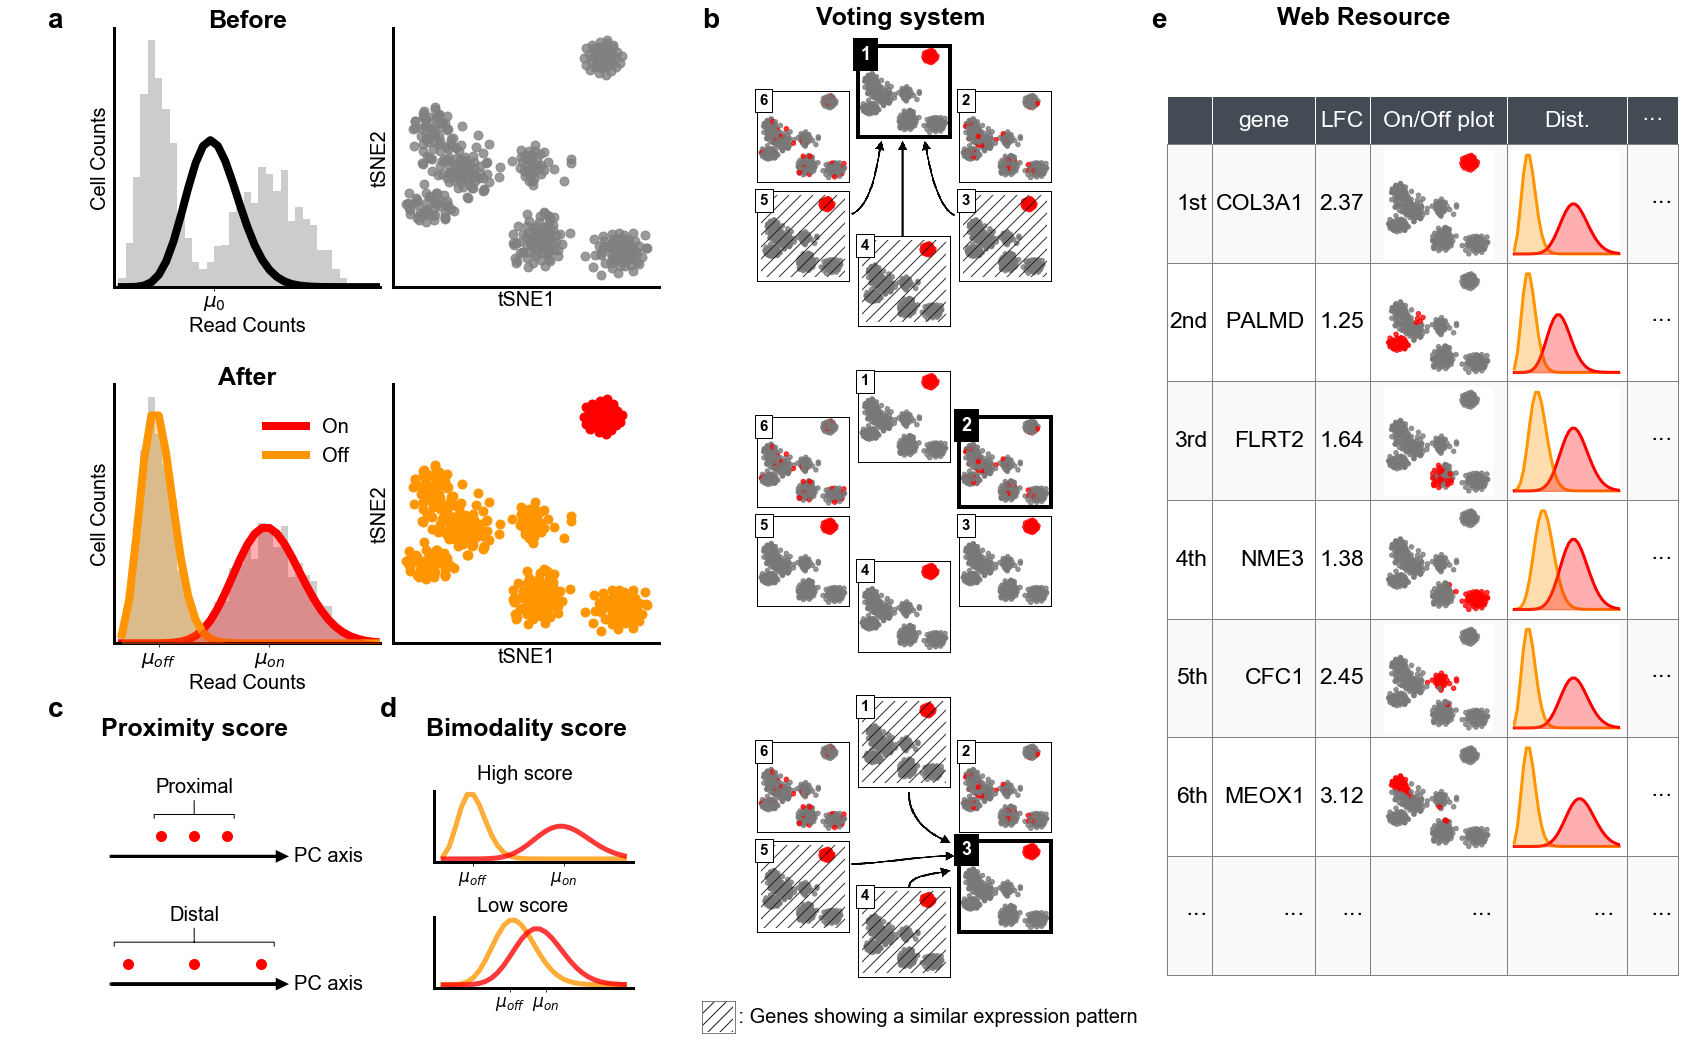

In [24]:
fig1 = plt.figure(figsize=(27, 25))
gs1 = fig1.add_gridspec(25, 27)

# left panel
fig_left = fig1.add_subplot(gs1[0:12,0:12])
figis1 = fig_left.inset_axes([0.13, 0.60, 0.4, 0.4])
figis2 = fig_left.inset_axes([0.13, 0.05, 0.4, 0.4])

bimodal_plot(figis1,figis2)


# histogram

figis3 = fig_left.inset_axes([0.55, 0.60, 0.4, 0.4])
figis4 = fig_left.inset_axes([0.55, 0.05, 0.4, 0.4])
tsne_plot(figis3,figis4)

#fig_left.text(0.08, 0.75, 'Before', fontproperties=font_prop(bold=True,size=20), ha='right', va='center')
#fig_left.text(0.08, 0.25, 'After', fontproperties=font_prop(bold=True,size=20), ha='right', va='center')

fig_left.text(0.33, 1.01, 'Before', fontproperties=font_prop(bold=True,size=25), ha='center', va='center',zorder=10)
fig_left.text(0.33, 0.46, 'After', fontproperties=font_prop(bold=True,size=25), ha='center', va='center',zorder=10)

fig_left.axis('off')




# right panel
fig_right = fig1.add_subplot(gs1[0:18,12:21])
fig_right.set_xlim([0,3])
fig_right.set_ylim([0,6])

figis1r = fig_right.inset_axes([1/6/3,(4+1/6)/6,5/3/3,5/3/6])
figis2r = fig_right.inset_axes([1/6/3,(2+1/6)/6,5/3/3,5/3/6])
figis3r = fig_right.inset_axes([1/6/3,(0+1/6)/6,5/3/3,5/3/6])

axes_right = [figis1r, figis2r, figis3r]
for ax in axes_right:
    ax.axis('off')

hexa_plot(figis1r,0) #[(1,0,0,0.3), (0,0,0,0.1), (1,0,0,0.05), (1,0,0,0.05), (1,0,0,0.05), (0,0,0,0.1)])
hexa_plot(figis2r,1) #[(1,0,0,0.05), (0,0,0,0.1), (1,0,0,0.05), (1,0,0,0.05), (1,0,0,0.05), (0,0,0,0.3)])
hexa_plot(figis3r,2) #[(1,0,0,0.05), (0,0,0,0.1), (1,0,0,0.3), (1,0,0,0.05), (1,0,0,0.05), (0,0,0,0.1)])

"""
fig_right.text(1.9, 5, 'Agreed', ha='left', va='center', 
               fontproperties=font_prop(bold=True,size=25))
fig_right.text(1.9, 3, 'Disagreed', ha='left', va='center',
               fontproperties=font_prop(bold=True,size=25))
fig_right.text(1.9, 1, 'Agreed', ha='left', va='center', 
               fontproperties=font_prop(bold=True,size=25))
"""
fig_right.axis('off')
fig_right.text(0.4, 1.01, 'Voting system', ha='center', va='center',
               fontproperties=font_prop(bold=True,size=25), transform=fig_right.transAxes)

#figis_annot = fig_right.inset_axes([2/3+0.05, 2/3+0.25, (1/3-1/4)*2*1.2, (1/3-1/4)*1.2])
#hexa_plot_annot(figis_annot)
#fig_right.text(0.55, 1.2, 'Genes', ha='center', va='center', fontsize=15, fontweight='bold', transform=figis_annot.transAxes)
#figis_annot.axis('off')


figis_annot2 = fig_right.inset_axes([0.0, -0.03, (1/3-1/4)*2*1.2*1/3, (1/3-1/4)*1.2*1/3])
figis_annot2.fill_between([0,1],[1,1],0,
                                    facecolor="none",hatch="//",edgecolor=(0.1,0.1,0.1,1.0),
                                   linewidth=0.0)
figis_annot2.yaxis.set_label_position("right")
figis_annot2.set_ylabel(' : Genes showing a similar expression pattern', fontsize=20, rotation=0,labelpad=200,va='center',ha='center',alpha=0.99)


for axis in ['top','bottom','left','right']:
    figis_annot2.spines[axis].set_linewidth(0.5)    
figis_annot2.set_xticks([])
figis_annot2.set_yticks([])


# lower pnael
fig_low = fig1.add_subplot(gs1[12:18,0:12])
fig_low.set_xlim([0,8])
fig_low.set_ylim([0,4])

proximity_plot(fig_low)
QQ_score(fig_low)


fig_low.axis('off')

fig_web = fig1.add_subplot(gs1[0:18,20:26])
web_plot(fig_web)
fig_web.text(0.65, 1.01, 'Web Resource', ha='center', va='center',
               fontproperties=font_prop(bold=True,size=25), transform=fig_web.transAxes)

fig_web.axis('off')

# abc
fig_left.text(0.03, 1, 'a', fontproperties=font_prop(bold=True,size=28), transform=fig_left.transAxes)
fig_right.text(0, 1, 'b', fontproperties=font_prop(bold=True,size=28), transform=fig_right.transAxes)
fig_low.text(0.03, 0.9, 'c', fontproperties=font_prop(bold=True,size=28), transform=fig_low.transAxes)
fig_low.text(0.03+0.5, 0.9, 'd', fontproperties=font_prop(bold=True,size=28), transform=fig_low.transAxes)
fig_web.text(0, 1, 'e', fontproperties=font_prop(bold=True,size=28), transform=fig_web.transAxes)

In [23]:
import pandas as pd
def web_plot(ax):
    df=pd.DataFrame(columns=['','gene','LFC','On/Off plot','Dist.','···'],index=[1,2,3,4,5])
    df.loc[1]=['1st','COL3A1','2.37','','','···']
    df.loc[2]=['2nd','PALMD','1.25','','','···']
    df.loc[3]=['3rd','FLRT2','1.64','','','···']
    df.loc[4]=['4th','NME3','1.38','','','···']
    df.loc[5]=['5th','CFC1','2.45','','','···']
    df.loc[6]=['6th','MEOX1','3.12','','','···']
    df.loc[7]=['···','···','···','···','···','···']
    
    cell_text = []
    for row in df.index:
        cell_text.append(df.loc[row].values)
        
    #print(cell_text)
    table=ax.table(cellText=cell_text, colLabels=df.columns,
            #loc="top left",
            bbox = [0.05, 0.03,1+0.4+0.16,0.9],
            colWidths=[0.13,0.3,0.16,0.4,0.35,0.15],
            )
    table.set_fontsize(23)
    table.auto_set_font_size(False)
    cellDict=table.get_celld()
    col_height=0.04
    data_height=0.1
    [cellDict[(0,j)].set_height(col_height) for j in range(6)]
    
    [cellDict[(0,j)].set_text_props(color='white',weight='bold') for j in range(6)]
    [cellDict[(0,j)].set_facecolor((67/256,75/256,84/256)) for j in range(6)]
    [cellDict[(0,j)].set_edgecolor('white') for j in range(6)]
    
    #[cellDict[(i+1,j)].set_facecolor((0.93,0.93,0.93,0.5)) for i in [0,2,4,6] for j in range(0,5)]
    [cellDict[(i+1,j)].set_facecolor((0.93,0.93,0.93,0.3)) for i in [0,2,4,6] for j in range(0,6)]
    
    
    [cellDict[(i,j)].set_edgecolor('grey') for i in range(1,8) for j in range(0,6)]
    [cellDict[(i,j)].set_text_props(weight='bold') for i in range(1,8) for j in range(0,1)]
    [cellDict[(i,j)].set_height(data_height) for i in range(1,8) for j in range(6)]
    #print(cellDict[(0,0)].__dir__())
    [cellDict[(i,j)].get_text().set_ha(u'center') for i in range(1,8) for j in range(6)]
    
    #[cellDict[(i,j)].set_edgecolor((0,0,0,1)) for i in range(1,8) for j in [0,4]]
    
    """
    ax.text(0.03,0.85,'{:d}'.format((1)), 
               fontproperties=font_prop(bold=True,
                                        size=18 if idx==i else 15),
               color=(1,1,1,1) if idx==i else (0,0,0,1),
               transform=ax_in.transAxes,

               bbox = dict(boxstyle='square',
                           facecolor=(0,0,0,1) if idx==i else (1,1,1,1), 
                           linewidth=4 if idx==i else 1,
                          alpha=1),
               zorder=10)    
    """
    
    exp_data_meta=pd.read_csv('/data01/ch6845/dynamic_cell_classifier/data/koh_extract/koh.metadata.tsv',sep='\t')
    exp_data_meta=exp_data_meta.rename(columns={'tSNE_1':'TSNE_1','tSNE_2':'TSNE_2'})
    exp_data_meta['phenoid']=exp_data_meta['celltype']    
    
    ratio=6/18
    coord_w=0.85
    #x=0.195
    #x=0.55
    x=0.71
    y=0.885
    
    coords=[
        [x, y-coord_w*1/7,   1/3,1/3*ratio],
        [x, y-coord_w*2/7,   1/3,1/3*ratio],
        [x, y-coord_w*3/7,   1/3,1/3*ratio],
        [x, y-coord_w*4/7,   1/3,1/3*ratio],
        [x, y-coord_w*5/7,   1/3,1/3*ratio],
        [x, y-coord_w*6/7,   1/3,1/3*ratio],
    ]    
    
    axes = [(ax.inset_axes(coord),ax.inset_axes((coord[0]+0.39,coord[1],coord[2],coord[3]))) for coord in coords]
    
    c_on=np.array([256, 0, 0, 200])/256
    c_off=np.array([120, 120, 120, 200])/256
    
    
    for i, (ax_in,ax_in_dist) in zip(range(7), axes):
        category=['hESC', 'D2LtM', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm','D5CntrlDrmmtm','APS' ]
        print(category[i])
        col=exp_data_meta['phenoid'].apply(lambda x: c_on if x==category[i] else c_off ).values            
        
        ax_in.scatter(exp_data_meta['TSNE_1'], exp_data_meta['TSNE_2'], s=20, c=col)
        #ax.patch.set_facecolor(fc)    
        
        for axis in ['top','bottom','left','right']:
            ax_in.spines[axis].set_linewidth(0) 

        ax_in.set_xticks([])
        ax_in.set_yticks([])
        ax_in.set_xticklabels([])
        ax_in.set_yticklabels([])  
        
        x = np.linspace(0, 40, 41)
        y1 = ss.poisson.pmf(k=x, mu=[5,5,8,10,5,5][i])
        y2 = ss.poisson.pmf(k=x, mu=[20,15,20,20,20,22][i])     
        
        bin_array = np.linspace(-0.5, 30.5, 32)
        
        ax_in_dist.plot(x, y1, linestyle='-', linewidth=3, c=np.array([256, 150, 0, 256])/256)
        ax_in_dist.plot(x, y2, linestyle='-', linewidth=3, c=np.array([256, 0, 0, 256])/256)
        #ax2.plot(x, y3, linestyle=ls2, alpha=alpha2, c=(0,0,0,1))    

        ax_in_dist.fill_between(x, y1, 0, color=np.array([256, 150, 0, 80])/256, zorder=5)
        ax_in_dist.fill_between(x, y2, 0, color=np.array([256, 0, 0, 80])/256, zorder=5)        
        
        for axis in ['top','bottom','left','right']:
            ax_in_dist.spines[axis].set_linewidth(0) 

        ax_in_dist.set_xticks([])
        ax_in_dist.set_yticks([])
        ax_in_dist.set_xticklabels([])
        ax_in_dist.set_yticklabels([])   
        
        ax_in_dist.set_xlim([-1,35])
    
    
    #table.scale(1, 1.5)
    #                ,
    #                loc='top left',
    #              bbox = [2,0,0.5,1])
    
    #table.set_text_props(fontproperties=font_prop(bold=False,size=20))
web_plot(fig_web)    

hESC
D2LtM
MPS
DLL1pPXM
ESMT
Sclrtm


array(['hESC', 'APS', 'MPS', 'DLL1pPXM', 'ESMT', 'Sclrtm',
       'D5CntrlDrmmtm', 'D2LtM'], dtype=object)

,rank,on-off,Gene Info
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


In [25]:
fig1.savefig('pub/overview.png',tight_layout=True)
fig1.savefig('pub/overview.svg')

In [390]:
xy=np.array(draw_arc(np.array((0,1)),np.array((1,0))))

In [104]:
plt.imshow?

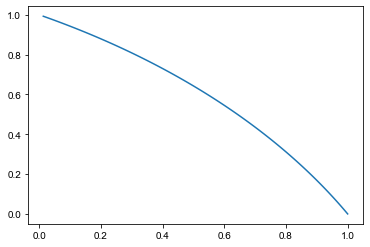

In [391]:
plt.plot(xy[:,0],xy[:,1])

AttributeError: 'str' object has no attribute 'set_xticks'

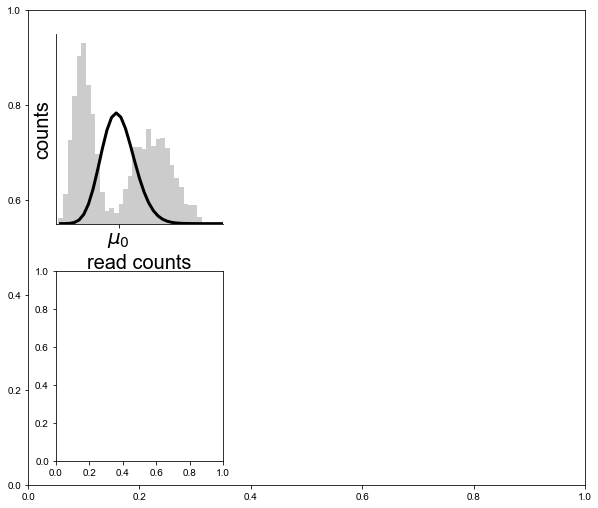

In [12]:
fig1 = plt.figure(figsize=(17, 13.5))
gs1 = fig1.add_gridspec(3, 4, width_ratios=[1,1, 0.6, 0.6])

# left panel
fig_left = fig1.add_subplot(gs1[0:2,0:2])
figis1 = fig_left.inset_axes([0.05, 0.55, 0.3, 0.4])
figis2 = fig_left.inset_axes([0.05, 0.05, 0.3, 0.4])

bimodal_plot(figis1, 'before')
bimodal_plot(figis2, 'after')

# histogram

figis3 = fig_left.inset_axes([0.45, 0.55, 0.3, 0.4])
figis4 = fig_left.inset_axes([0.45, 0.05, 0.3, 0.4])
tsne_plot(figis3, 'before')
tsne_plot(figis4, 'after')

fig_left.text(0.8, 0.75, 'Before', fontsize=15, fontweight='bold', ha='left', va='center')
fig_left.text(0.8, 0.25, 'After', fontsize=15, fontweight='bold', ha='left', va='center')
fig_left.axis('off')

# right panel
fig_right = fig1.add_subplot(gs1[0:3,2:4])
fig_right.set_xlim([0,3])
fig_right.set_ylim([0,6])

figis1r = fig_right.inset_axes([1/6/3,(4+1/6)/6,5/3/3,5/3/6])
figis2r = fig_right.inset_axes([1/6/3,(2+1/6)/6,5/3/3,5/3/6])
figis3r = fig_right.inset_axes([1/6/3,(0+1/6)/6,5/3/3,5/3/6])

axes_right = [figis1r, figis2r, figis3r]
for ax in axes_right:
    ax.axis('off')

hexa_plot(figis1r, [(1,0,0,0.3), (0,0,0,0.1), (1,0,0,0.05), (1,0,0,0.05), (1,0,0,0.05), (0,0,0,0.1)])
hexa_plot(figis2r, [(1,0,0,0.05), (0,0,0,0.1), (1,0,0,0.3), (1,0,0,0.05), (1,0,0,0.05), (0,0,0,0.1)])
hexa_plot(figis3r, [(1,0,0,0.05), (0,0,0,0.1), (1,0,0,0.05), (1,0,0,0.05), (1,0,0,0.05), (0,0,0,0.3)])

fig_right.text(2.5, 5, 'Agreed', ha='center', va='center', fontsize=20, fontweight='bold')
fig_right.text(2.5, 3, 'Agreed', ha='center', va='center', fontsize=20, fontweight='bold')
fig_right.text(2.5, 1, 'Disagreed', ha='center', va='center', fontsize=20)

fig_right.axis('off')
fig_right.text(-0.1, 0.5, 'Voting system', ha='center', va='center', rotation=90, fontsize=20, fontweight='bold', transform=fig_right.transAxes)

figis_annot = fig_right.inset_axes([2/3+0.05, 2/3+0.25, (1/3-1/4)*2*1.2, (1/3-1/4)*1.2])
hexa_plot_annot(figis_annot)
figis_annot.set_title('Markers', fontsize=15, fontweight='bold')
figis_annot.axis('off')

# lower pnael
fig_low = fig1.add_subplot(gs1[2,0:2])
fig_low.set_xlim([0,8])
fig_low.set_ylim([0,4])

proximity_plot(fig_low)
QQ_score(fig_low)

# abc
fig_left.text(0, 1, 'a', fontweight='bold', fontsize=20, transform=fig_left.transAxes)
fig_right.text(0, 1, 'b', fontweight='bold', fontsize=20, transform=fig_right.transAxes)
fig_low.text(0, 1, 'c', fontweight='bold', fontsize=20, transform=fig_low.transAxes)

fig_low.axis('off')
plt.show()